In [17]:
import pandas as pd
import numpy as np
import glob

In [18]:
list_excel = glob.glob('../data/raw_properties/*.xlsx')
data = []

for file in list_excel:
    dfi = pd.read_excel(file, index_col=0)
    comuna = file.split('_')[-1].split('.')[0]
    dfi['comuna'] = comuna
    data.append(dfi)

data = pd.concat(data)

<Axes: xlabel='comuna'>

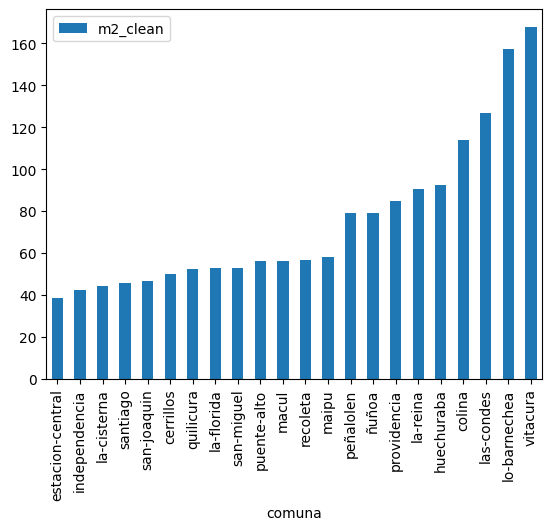

In [19]:
data_filter = data.loc[data.proyecto==False]
data_filter.groupby('comuna').agg({'m2_clean': 'mean'}).sort_values('m2_clean').plot(kind='bar')

In [20]:
data_filter.iloc[0].link

'https://www.portalinmobiliario.com/MLC-1489933165-encantador-depto-en-independencia-de-2-dormitorios-y-2-banos-_JM#position=19&search_layout=grid&type=item&tracking_id=8a31704e-3a69-4406-b08f-66257fbfe40f'

In [25]:
data_filter.loc[data_filter.comuna=='estacion-central'].sort_values('price_clean_uf')

,link,price,dormitorios,banos,m2,unidad,price_clean,proyecto,dormitorios_clean,banos_clean,m2_clean,comuna,price_clean_uf
1475,https://www.portalinmobiliario.com/MLC-2474912...,$150.000,1 dormitorio,1 baño,22 m² útiles,$,150000,False,1.0,1.0,22.0,estacion-central,4.0
201,https://www.portalinmobiliario.com/MLC-1495800...,$150.000,1 dormitorio,1 baño,29 m² útiles,$,150000,False,1.0,1.0,29.0,estacion-central,4.0
36,https://www.portalinmobiliario.com/MLC-2567166...,$150.000,1 dormitorio,1 baño,20 m² útiles,$,150000,False,1.0,1.0,20.0,estacion-central,4.0
1034,https://www.portalinmobiliario.com/MLC-2498030...,$150.000,1 dormitorio,1 baño,27 m² útiles,$,150000,False,1.0,1.0,27.0,estacion-central,4.0
1373,https://www.portalinmobiliario.com/MLC-1490984...,$150.000,1 dormitorio,1 baño,34 m² útiles,$,150000,False,1.0,1.0,34.0,estacion-central,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,https://www.portalinmobiliario.com/MLC-2538003...,$52.000.000,1 dormitorio,1 baño,28 m² útiles,$,52000000,False,1.0,1.0,28.0,estacion-central,NaN
1914,https://www.portalinmobiliario.com/MLC-1494781...,UF1.200,1 dormitorio,1 baño,30 m² útiles,UF,1200,False,1.0,1.0,30.0,estacion-central,NaN
1915,https://www.portalinmobiliario.com/MLC-2507796...,$80.000.000,2 dormitorios,1 baño,42 m² útiles,$,80000000,False,2.0,1.0,42.0,estacion-central,NaN
1916,https://www.portalinmobiliario.com/MLC-2470358...,UF1.999,1 dormitorio,1 baño,28 m² útiles,UF,1999,False,1.0,1.0,28.0,estacion-central,NaN


In [23]:
data_filter.groupby('comuna').agg({'price_clean_uf':'mean', 'dormitorios_clean':'mean', 'banos_clean':'mean',
                                   'm2_clean':'mean', 'link':'count'}).sort_values('m2_clean')

,price_clean_uf,dormitorios_clean,banos_clean,m2_clean,link
comuna,,,,,
estacion-central,139.512420,1.510748,1.202923,38.412364,3489
independencia,13.237907,1.730111,1.210436,42.495325,2338
la-cisterna,16.455914,2.020125,1.261624,44.146426,1441
santiago,13.946247,1.634955,1.330572,45.693474,3742
san-joaquin,10.136814,2.098039,1.315234,46.706505,663
cerrillos,20.766596,1.914286,1.251429,50.011429,175
quilicura,11.676444,2.615044,1.225664,52.601770,226
la-florida,13.099567,1.984672,1.520438,52.876914,2740
san-miguel,14.957279,2.049918,1.501468,52.888605,3065


In [22]:
data_filter.to_csv('../data/consolidated_properties/data_consolidada_RM.csv')